In [1]:
# eda_foodiebay.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("E:\FoodieBay DataSet\data\FoodieBay.csv")

In [3]:
# Clean 'rate' column
df['rate'] = df['rate'].astype(str).str.replace('/5', '').str.strip()
df['rate'] = df['rate'].replace(['NEW', '-', 'nan'], None)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

In [4]:
# Convert numeric columns
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['ave_cost_for_two'] = pd.to_numeric(df['ave_cost_for_two'], errors='coerce')
df['ave_review_ranking'] = pd.to_numeric(df['ave_review_ranking'], errors='coerce')

In [5]:
# Encode Yes/No columns
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

In [6]:
# Drop irrelevant columns
df.drop(columns=['url', 'address', 'phone', 'name', 'menu_item'], inplace=True)

In [7]:
# Label encode categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['location', 'rest_type', 'listed_in_type', 'listed_in_city', 'cuisines']:
    df[col] = le.fit_transform(df[col].astype(str))

In [8]:
# Summary statistics
print("\nData Summary:\n", df.describe())


Data Summary:
            location     rest_type      cuisines  listed_in_type  \
count  40130.000000  40130.000000  40130.000000    40130.000000   
mean      35.374009      3.641964   1152.059208        2.749439   
std       27.336681      1.703521    639.213231        1.094749   
min        0.000000      0.000000      0.000000        0.000000   
25%        9.000000      2.000000    546.000000        2.000000   
50%       32.000000      5.000000   1277.000000        2.000000   
75%       55.000000      5.000000   1652.750000        4.000000   
max       92.000000      6.000000   2213.000000        6.000000   

       listed_in_city  online_order    book_table  ave_cost_for_two  \
count    40130.000000  40130.000000  40130.000000      39890.000000   
mean        14.070994      0.611986      0.102018        506.697293   
std          8.244336      0.487304      0.302676        324.164372   
min          0.000000      0.000000      0.000000         40.000000   
25%          7.000000    

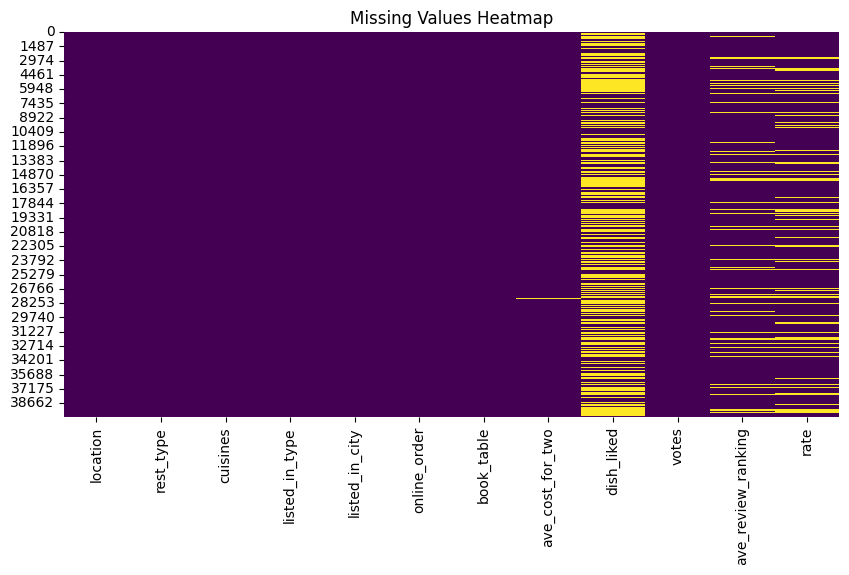

In [9]:
# Missing value heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [10]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

ValueError: could not convert string to float: 'Fish, Dumplings, Biryani, Paneer Tikka Masala, Manchow Soup, Chicken Wings, Chop Suey'

<Figure size 1200x800 with 0 Axes>

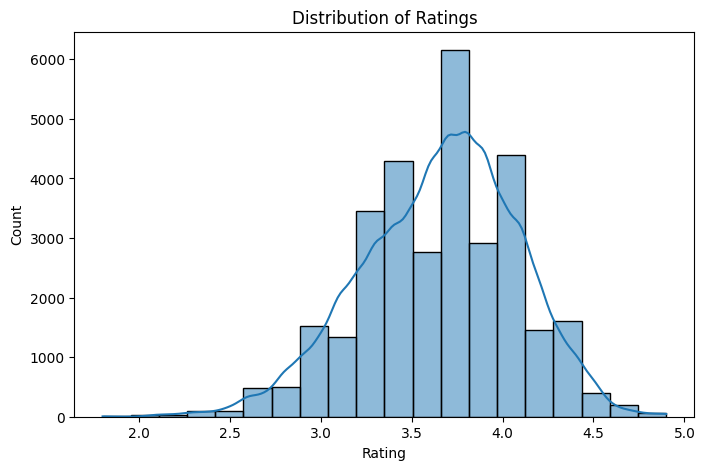

In [11]:
# Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['rate'].dropna(), kde=True, bins=20)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.show()

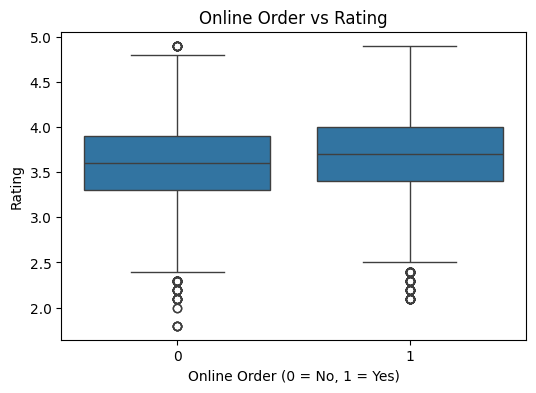

In [12]:
# Online Order vs Rating
plt.figure(figsize=(6, 4))
sns.boxplot(x='online_order', y='rate', data=df)
plt.title("Online Order vs Rating")
plt.xlabel("Online Order (0 = No, 1 = Yes)")
plt.ylabel("Rating")
plt.show()

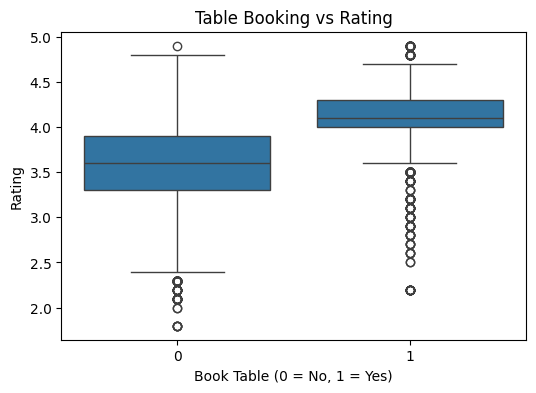

In [13]:
# Book Table vs Rating
plt.figure(figsize=(6, 4))
sns.boxplot(x='book_table', y='rate', data=df)
plt.title("Table Booking vs Rating")
plt.xlabel("Book Table (0 = No, 1 = Yes)")
plt.ylabel("Rating")
plt.show()

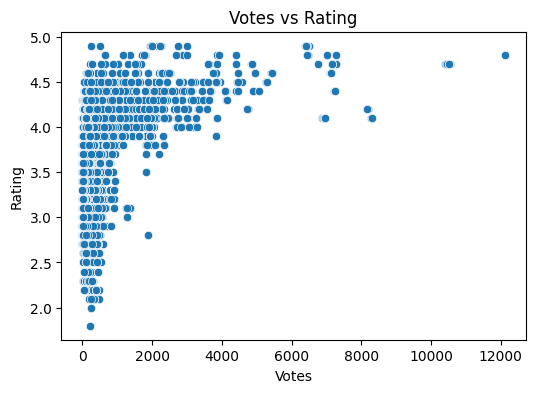

In [14]:
# Votes vs Rating
plt.figure(figsize=(6, 4))
sns.scatterplot(x='votes', y='rate', data=df)
plt.title("Votes vs Rating")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()

In [15]:
df.head()

,location,rest_type,cuisines,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,dish_liked,votes,ave_review_ranking,rate
0,3,1,467,1,12,0,0,700.0,NaN,13,4.75,3.6
1,41,5,442,4,17,1,0,400.0,NaN,28,4.50,3.8
2,4,5,2056,2,13,1,0,200.0,NaN,18,4.00,3.9
3,78,2,753,2,5,1,1,1200.0,"Fish, Dumplings, Biryani, Paneer Tikka Masala,...",550,4.80,4.3
4,60,1,651,4,24,1,0,250.0,"Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...",67,3.00,3.7


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=300)  # limit to 300 words
dish_features = tfidf.fit_transform(df['dish_liked'].fillna("")).toarray()

import pandas as pd
tfidf_df = pd.DataFrame(dish_features, columns=tfidf.get_feature_names_out())

df = pd.concat([df.drop(columns=['dish_liked']), tfidf_df], axis=1)
